# Analysis of my own Strava exercise activities 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt

Now that we imported our libraries, lets load the activities.csv file 

In [32]:
df = pd.read_csv('activities_miracle_strava.csv') #read in csv
df.columns=df.columns.str.lower() #change columns to lower case

## Data Wranglng 

In [33]:
df.shape # this will show how many rows and columns the data frame has 


(342, 87)

in this case i have 342 unique rows and 87 colums 

In [34]:
df.head() #this returns the top 5 rows 

,activity id,activity date,activity name,activity type,activity description,elapsed time,distance,max heart rate,relative effort,commute,...,"<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.total_grit"">total grit</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.avg_flow"">avg flow</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.flagged"">flagged</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">avg elapsed speed</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.dirt_distance"">dirt distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">newly explored distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">newly explored dirt distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.sport_type"">sport type</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.total_steps"">total steps</span>",media
0,3771835476,"May 18, 2020, 4:53:01 AM",Morning Run,Run,NaN,2285,6.46,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3771835488,"Jun 21, 2020, 6:17:08 AM",Morning Run,Run,NaN,3338,3.70,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3771835493,"Jun 1, 2020, 4:44:28 AM",Morning Run,Run,NaN,2517,6.76,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3771835501,"May 17, 2020, 4:51:11 AM",Morning Run,Run,NaN,2393,6.19,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3771835505,"May 5, 2020, 5:44:37 AM",Morning Run,Run,NaN,2424,5.06,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we see some columns with NaN values from the top 5 of our data. but before we discard them lets see the bottom 5 rows 

In [35]:
df.tail() #returns the bottom 5 rows 

,activity id,activity date,activity name,activity type,activity description,elapsed time,distance,max heart rate,relative effort,commute,...,"<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.total_grit"">total grit</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.avg_flow"">avg flow</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.flagged"">flagged</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.avg_elapsed_speed"">avg elapsed speed</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.dirt_distance"">dirt distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.newly_explored_distance"">newly explored distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.newly_explored_dirt_distance"">newly explored dirt distance</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.sport_type"">sport type</span>","<span class=""translation_missing"" title=""translation missing: en-us.lib.export.portability_exporter.activities.horton_values.total_steps"">total steps</span>",media
337,9422524414,"Jul 10, 2023, 6:13:41 AM",Morning Run,Run,NaN,2324,6.21,171.0,41.0,False,...,NaN,NaN,0.0,2.671738,0.0,NaN,NaN,NaN,6190.0,NaN
338,9431274399,"Jul 11, 2023, 1:56:21 PM",Afternoon Run,Run,NaN,2593,6.69,173.0,56.0,False,...,NaN,NaN,0.0,2.582418,0.0,NaN,NaN,NaN,6676.0,NaN
339,9435321805,"Jul 12, 2023, 6:02:32 AM",Morning Run,Run,NaN,2315,6.20,171.0,41.0,False,...,NaN,NaN,0.0,2.680700,0.0,NaN,NaN,NaN,6114.0,NaN
340,9441718570,"Jul 13, 2023, 5:52:04 AM",Morning Run,Run,NaN,2311,6.27,173.0,47.0,False,...,NaN,NaN,0.0,2.714124,0.0,NaN,NaN,NaN,6104.0,NaN
341,9447879141,"Jul 14, 2023, 5:58:22 AM",Morning Run,Run,NaN,2335,6.30,170.0,43.0,False,...,NaN,NaN,0.0,2.699841,0.0,NaN,NaN,NaN,6158.0,NaN


lets pull all column names 

In [36]:
df.info() #shows all column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 87 columns):
 #   Column                                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                                          --------------  -----  
 0   activity id                                                                                                                                                                                     342 non-null    int64  
 1   activity date                                                                                                                                                                                   342 non-null    object 
 2   activi

lets Create a new dataframe named 'New_cols' with only columns that we are going to use in this project 

In [37]:

New_cols = ['activity id', 'activity date', 'activity name','activity type', 'elapsed time', 'moving time', 'distance',   
         'max heart rate', 'elevation gain','elevation high','average speed','max speed','average cadence','max cadence','calories'
       ]
df = df[New_cols] 
df

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,elevation high,average speed,max speed,average cadence,max cadence,calories
0,3771835476,"May 18, 2020, 4:53:01 AM",Morning Run,Run,2285,2275,6.46,NaN,103.599998,60.400002,2.842022,3.900000,80.911659,87.0,NaN
1,3771835488,"Jun 21, 2020, 6:17:08 AM",Morning Run,Run,3338,2212,3.70,NaN,88.199997,53.799999,1.673734,3.100000,64.852310,86.0,NaN
2,3771835493,"Jun 1, 2020, 4:44:28 AM",Morning Run,Run,2517,2400,6.76,NaN,110.199997,54.400002,2.819458,4.200000,80.999580,89.0,NaN
3,3771835501,"May 17, 2020, 4:51:11 AM",Morning Run,Run,2393,2215,6.19,NaN,129.000000,56.400002,2.796885,7.400000,79.153175,117.0,NaN
4,3771835505,"May 5, 2020, 5:44:37 AM",Morning Run,Run,2424,1839,5.06,NaN,281.600006,67.199997,2.752148,5.400000,78.883057,89.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,9422524414,"Jul 10, 2023, 6:13:41 AM",Morning Run,Run,2324,2309,6.21,171.0,96.000000,54.200001,2.689095,5.698047,79.971527,114.0,492.0
338,9431274399,"Jul 11, 2023, 1:56:21 PM",Afternoon Run,Run,2593,2512,6.69,173.0,120.000000,-12.200000,2.665689,4.211426,77.575661,93.0,551.0
339,9435321805,"Jul 12, 2023, 6:02:32 AM",Morning Run,Run,2315,2294,6.20,171.0,98.000000,-31.799999,2.705240,4.420003,79.618546,95.0,483.0
340,9441718570,"Jul 13, 2023, 5:52:04 AM",Morning Run,Run,2311,2270,6.27,173.0,92.000000,-32.200001,2.763145,4.361654,79.855545,94.0,503.0


Now we only left with a total of  15 columns from a  previous total of 87 columns

Lets check our data types

In [38]:
df.dtypes

activity id          int64
activity date       object
activity name       object
activity type       object
elapsed time         int64
moving time          int64
distance           float64
max heart rate     float64
elevation gain     float64
elevation high     float64
average speed      float64
max speed          float64
average cadence    float64
max cadence        float64
calories           float64
dtype: object

As we can see our date is regarded as an object data type therefore lets convert it to date time data type so we can be able to work better with it. as we break it down into more columns

In [123]:

df['activity_date'] = pd.to_datetime(df['activity date']) #converting activity data to datetime from object data type
df['start_time'] = df['activity_date'].dt.time #break date into start time and date
df['start_date_local'] = df['activity_date'].dt.date
df['week'] = df['activity_date'].dt.day_name()
df['month'] = df['activity_date'].dt.month_name()
df['year'] = df['activity_date'].dt.year
df['year'] = (df['year']).astype(np.object) #change year from numeric to object
df['dayofyear'] = df['activity_date'].dt.dayofyear
df['dayofyear'] = pd.to_numeric(df['dayofyear'])
df.head(5)

,activity id,activity date,activity name,activity type,elapsed time,moving time,distance,max heart rate,elevation gain,elevation high,...,activity_date,start_time,start_date_local,month,year,dayofyear,elapsed minutes,km per hour,avg pace,week
0,3771835476,"May 18, 2020, 4:53:01 AM",Morning Run,Run,2285,2275,6.46,NaN,103.599998,60.400002,...,2020-05-18 04:53:01,04:53:01,2020-05-18,May,2020,139,38.083333,10.177681,5.895253,Monday
1,3771835488,"Jun 21, 2020, 6:17:08 AM",Morning Run,Run,3338,2212,3.70,NaN,88.199997,53.799999,...,2020-06-21 06:17:08,06:17:08,2020-06-21,June,2020,173,55.633333,3.990413,15.036036,Sunday
2,3771835493,"Jun 1, 2020, 4:44:28 AM",Morning Run,Run,2517,2400,6.76,NaN,110.199997,54.400002,...,2020-06-01 04:44:28,04:44:28,2020-06-01,June,2020,153,41.950000,9.668653,6.205621,Monday
3,3771835501,"May 17, 2020, 4:51:11 AM",Morning Run,Run,2393,2215,6.19,NaN,129.000000,56.400002,...,2020-05-17 04:51:11,04:51:11,2020-05-17,May,2020,138,39.883333,9.312160,6.443188,Sunday
4,3771835505,"May 5, 2020, 5:44:37 AM",Morning Run,Run,2424,1839,5.06,NaN,281.600006,67.199997,...,2020-05-05 05:44:37,05:44:37,2020-05-05,May,2020,126,40.400000,7.514851,7.984190,Tuesday


convert distance from object to numeric

In [124]:

df['distance'] = pd.to_numeric(df['distance'], errors = 'coerce')

lets create some additional columns to our df now that distance is converted to a numeric value, 

In [125]:
df['elapsed minutes'] = df['elapsed time'] /60 
df['km per hour'] = df['distance'] / (df['elapsed minutes'] / 60)
df['avg pace'] = df['elapsed minutes'] / df['distance']

now lets check our data types again

In [126]:
df.dtypes


activity id                  int64
activity date               object
activity name               object
activity type               object
elapsed time                 int64
moving time                  int64
distance                   float64
max heart rate             float64
elevation gain             float64
elevation high             float64
average speed              float64
max speed                  float64
average cadence            float64
max cadence                float64
calories                   float64
activity_date       datetime64[ns]
start_time                  object
start_date_local            object
month                       object
year                        object
dayofyear                    int64
elapsed minutes            float64
km per hour                float64
avg pace                   float64
week                        object
dtype: object

lets see how many diferent types of activities i participated in over these years.

In [44]:
df['activity type'].value_counts()

Run                314
Walk                17
Swim                 4
Weight Training      3
Hike                 2
Workout              2
Name: activity type, dtype: int64

In [45]:
df['activity name'].value_counts()

Morning Run           204
Afternoon Run         100
Morning Walk            9
Evening Run             5
Afternoon Walk          5
Lunch Run               4
Morning Activity        4
Afternoon Swim          4
Lunch Walk              3
Morning Hike            1
Afternoon Activity      1
morning run             1
Evening Hike            1
Name: activity name, dtype: int64

we can see that most of activity type is running and followed by walking therefore we are going to focus on running

In [46]:
running = df[df['activity type'] == 'Run']

Okay thats it for now lets jump over to the next stage 

## Exploratory Data Analysis

lets start with Running data

lets summerise our runing activities before we visualize it

In [48]:
running.describe().round(0)

,activity id,elapsed time,moving time,distance,max heart rate,elevation gain,elevation high,average speed,max speed,average cadence,max cadence,calories,dayofyear,elapsed minutes,km per hour,avg pace
count,3.140000e+02,314.0,314.0,314.0,296.0,314.0,183.0,314.0,314.0,313.0,313.0,292.0,314.0,314.0,313.0,313.0
mean,6.381656e+09,2840.0,2745.0,7.0,174.0,82.0,137.0,3.0,4.0,79.0,97.0,589.0,199.0,47.0,9.0,7.0
std,1.817868e+09,1213.0,1132.0,4.0,10.0,83.0,239.0,0.0,1.0,4.0,10.0,260.0,89.0,20.0,2.0,2.0
min,3.771835e+09,0.0,0.0,0.0,52.0,0.0,-58.0,0.0,0.0,61.0,79.0,107.0,2.0,0.0,3.0,3.0
25%,4.658395e+09,1884.0,1866.0,5.0,172.0,0.0,49.0,2.0,4.0,77.0,90.0,399.0,144.0,31.0,9.0,6.0
50%,6.232827e+09,2313.0,2248.0,6.0,174.0,84.0,54.0,3.0,4.0,80.0,94.0,454.0,198.0,39.0,10.0,6.0
75%,7.822205e+09,3778.0,3657.0,11.0,177.0,163.0,66.0,3.0,5.0,82.0,103.0,841.0,265.0,63.0,10.0,7.0
max,9.447879e+09,8975.0,8542.0,23.0,204.0,333.0,949.0,6.0,17.0,87.0,123.0,1683.0,363.0,150.0,20.0,18.0


now lets visualize

lets see

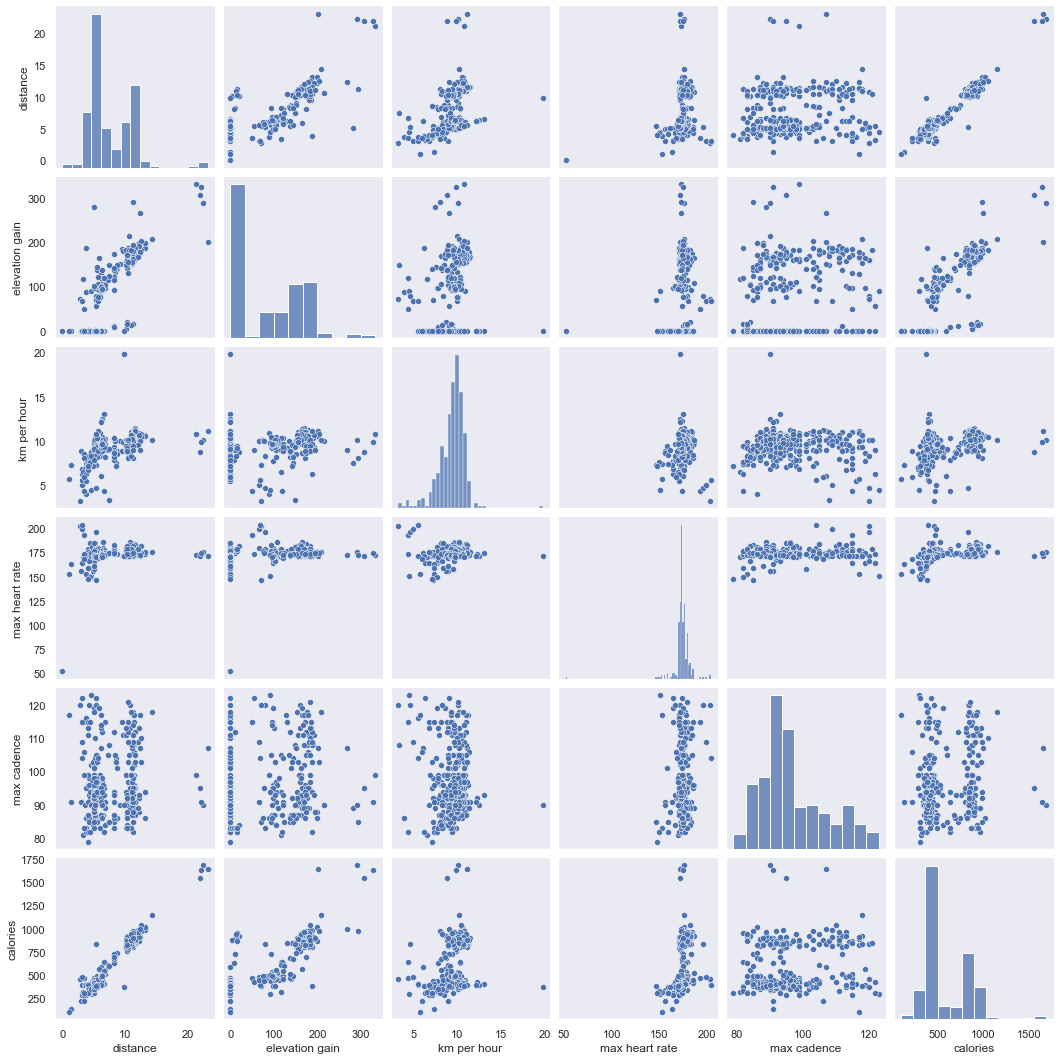

In [80]:
pp_df = running [['distance', 'elevation gain', 'km per hour', 'max heart rate', 'max cadence','calories']]
sns.pairplot(pp_df);

In this pairplot the histograms on the diagonal allows us to see the distribution of a single variable whilst the scatter plots on the upper and lower triangles show the relationship or lack relationship between two variables. for example we can see a positive correlation in my distance and calories 

In pair plot we can see correlation but if we want to properly visualize correlation we use corr() like i did bellow.

<AxesSubplot:>

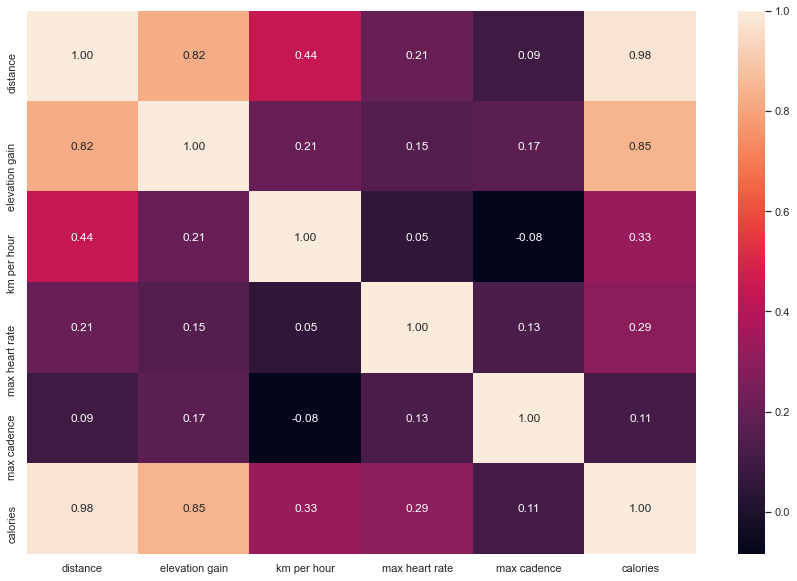

In [189]:
corr = running [['distance', 'elevation gain', 'km per hour', 'max heart rate', 'max cadence','calories']].corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt =".2f")

To understand this we look at the grid with a positive number that is closer to 1.00. for instance we see "calories" and "distance" have a correlation of 0.98 meaning that there is a high correlation between the 2 compared to "km per hour" and "max cadence" one does not have any impact on the other.

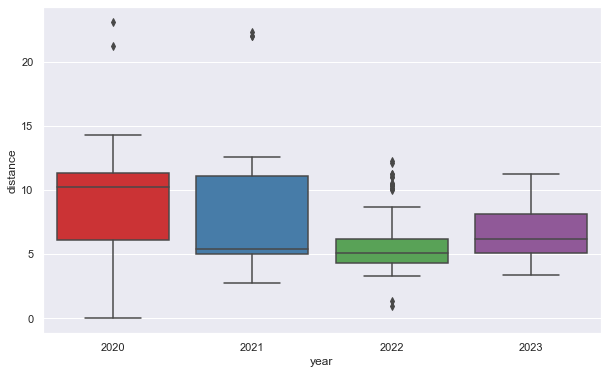

In [172]:
fig, ax = plt.subplots()
sns.set(style="darkgrid", font_scale=1)
sns.boxplot(x="year", y="distance",palette="Set1", data=running)            
plt.gcf().set_size_inches(10, 6)

As we can see 2020 is the year i had the highest runs and in i had the lowest input. its even lower than the current year 2023 and its only july.

''

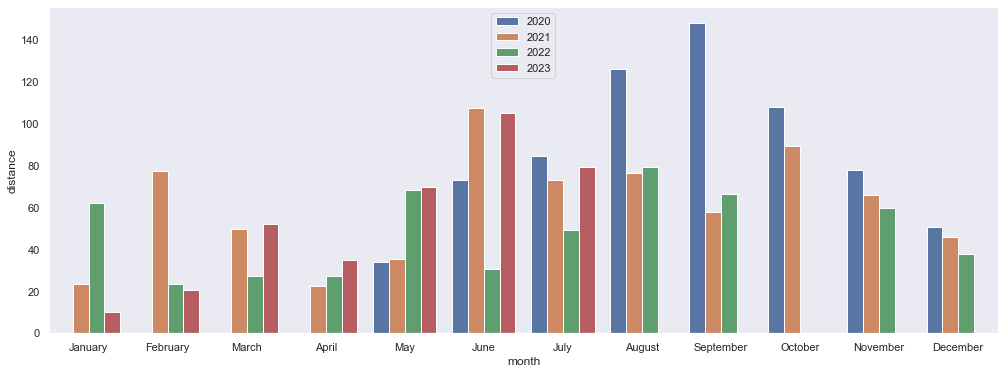

In [89]:
sns.set_style('dark')
sns.barplot(x='month', y='distance', data=running, hue='year', ci=None, estimator=np.sum,
           order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(17, 6)
plt.legend(loc='upper center')
;

We can see that i ran a lot in 2020 when i signed up for strava in june, though my 2021 june runs are superior but we cant say the some for other months after. with september 2020 where i reached my personal record which i am yet to break

lets see what are my favorite running times

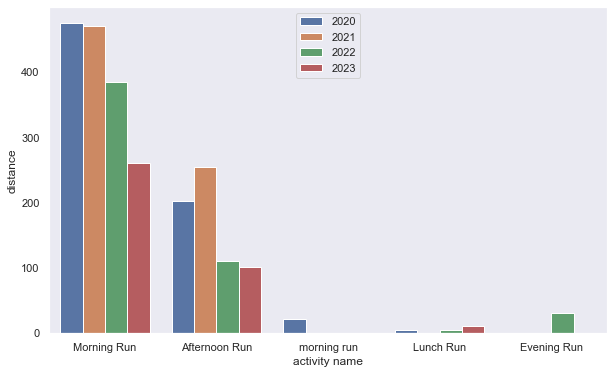

In [165]:
sns.set_style('dark')
sns.barplot(x='activity name', y='distance', data=running, hue='year', ci=None, estimator=np.sum)
          # order =["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
plt.gcf().set_size_inches(10, 6)
plt.legend(loc='upper center');

As i suspected i love jogging in the morning obviously there is redundency in the data there is one variable named "morning run" which is supposed to be under "Morning Run" with caps. 

lets create a coppy of running data frame to add a new colum with seasons

In [152]:
running_copy = running.copy()
running_copy['season'] = 'unknown'
running_copy.loc[running_copy ['month'].isin(['September', 'October', 'November']), 'season'] = 'Spring'
running_copy.loc[running_copy ['month'].isin(['December', 'January', 'February']), 'season'] = 'Summer'
running_copy.loc[running_copy ['month'].isin(['March', 'April', 'May']), 'season'] = 'Autumn'
running_copy.loc[running_copy ['month'].isin(['June', 'July', 'August']), 'season'] = 'Winter'


the see which season i run the most

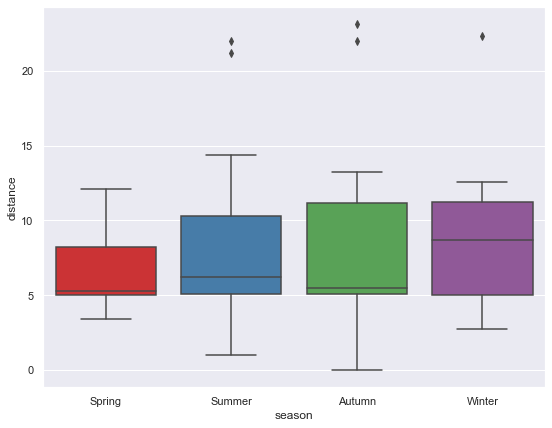

In [190]:
ax = sns.boxplot(x="season", y="distance", palette="Set1",
                    data=running,
                    order =["Spring", 'Summer', 'Autumn', 'Winter'])
plt.gcf().set_size_inches(9, 7)

This shows that i dont run much in spring maybe its bacause of rain and humidity.